# Clustering Exercises
This jupyter notebook provides some exercises with regard to clustering. 
## Distance
A clustering algorithm often uses some notion of distance between datapoints to divide the datapoints in clusters. Therefore as a first exercise, we will define some definition of distance. An often used distance measure is the $L^p$ norm. The $L^p$ norm is often defined as:

\begin{align}
\left\| \textbf{x} \right\|_p := \left( \sum_{i=1}^{n} \lvert x_i \rvert^p \right)^{1/p}
\end{align}

In this definition, the most often chosen values for $p$ are 1, 2 and $\infty$. 
- The $L^1$ norm is ofthen called the Taxicab norm or the Manhattan norm: see [Taxicab geometry](https://en.wikipedia.org/wiki/Taxicab_geometry).
- The $L^2$ norm is the same as the Euclidian distance.
- The $L^\infty$ norm is the same as the max(.) operator.

Now to practice some basic python and numpy, implement the euclidian distance using only simple matrix operations, in  `./code/utils.py`

In [1]:
import numpy as np

import sys
sys.path.append('code/')

import utils

x = np.asarray([1,2,3])[:,np.newaxis]
y = np.asarray([7,8,9])[:,np.newaxis]

L2 = utils.euclidian_distance(x,y)
print(L2)

10.392304845413264


## K-means
In this section we will try to implement a simple k-means clustering algorithm. To start we will make a dataset with *three* gaussian distributions.

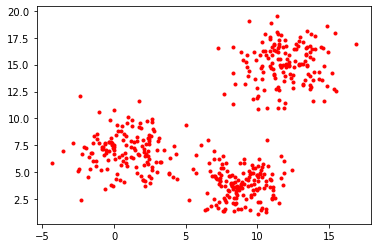

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('code/')

import utils


def generate_k_gaussian_distributions(k, dimensions=2, number_of_datapoints=150, min_value=0, max_value=20, min_sigma=1, max_sigma=2):
        # Allocate memory
        dataset = np.zeros((k*number_of_datapoints, dimensions))
        labels = np.zeros((k*number_of_datapoints, 1))
        
        # Fill dataset and labels with d dimensional data
        for i in range(1,k+1):
            x = np.random.randint(min_value, max_value)
            y = np.random.randint(min_value, max_value)
            sigma = utils.random_float(min_sigma, max_sigma)
            dataset[(i-1)*number_of_datapoints:i*number_of_datapoints] = np.random.normal((x,y), scale=sigma, size=(number_of_datapoints, dimensions))
            labels[(i-1)*number_of_datapoints:i*number_of_datapoints] = (i-1)
        
        # Return the data and labels
        return dataset, labels

# Seed at 10 does not give to much overlap between samples
# Thus is a nice starting point for this exercise
np.random.seed(10)
X, y = generate_k_gaussian_distributions(3)

plt.plot(X[:,0], X[:,1], 'r.')

For this exercise we are going to assume that we already found out how many cluster we need. Namely, $k=3$. Implement the fitting of the k-means algorithm in `./code/kmeans.py` and implement the prediction of the targets. Try and implement with basic matrix operations, speed in this case is not a priority. Some hints are given.

In [3]:
import sys
sys.path.append('code/')

import kmeans

k=3
alpha=0.01

# set a convenient value for alpha, alpha is a cut off value
# e.g. shutdown the algorithm if the means are not changing anymore
# alpha = ?
mu = kmeans.fit(X, k, alpha)
y_predict = kmeans.predict(X, mu)


mu start: 
[[7.30291583 2.2004012 ]
 [2.62724166 9.67605237]
 [5.20348073 2.47366068]]

mu new: 
[[7.30291583 2.2004012 ]
 [2.62724166 9.67605237]
 [5.20348073 2.47366068]]

mu old (loop 1): 
[[7.30291583 2.2004012 ]
 [2.62724166 9.67605237]
 [5.20348073 2.47366068]]

mu new (loop 1): 
[[ 9.07930442  3.96183638]
 [ 6.7536215  11.59752002]
 [ 2.52068861  4.46345349]]

mu new and old the same: 
True



## Ideas for additional topics
### Hierarchical clustering